# IMPORT LIBS

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTINF DATASET

In [64]:
df = pd.read_csv("../data/raw/train.csv")
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [65]:
df.drop(columns=['id'], inplace=True)

# EXPLORATORY_DATA_ANALYSIS

In [66]:
#data set shape 
print("Shape of the dataset:", df.shape)

Shape of the dataset: (18524, 8)


In [67]:
#df description
print("Dataset description:\n", df.describe().T)

Dataset description:
                            count      mean       std  min  25%  50%   75%  \
Time_spent_Alone         17334.0  3.137764  3.003786  0.0  1.0  2.0   4.0   
Social_event_attendance  17344.0  5.265106  2.753359  0.0  3.0  5.0   8.0   
Going_outside            17058.0  4.044319  2.062580  0.0  3.0  4.0   6.0   
Friends_circle_size      17470.0  7.996737  4.223484  0.0  5.0  8.0  12.0   
Post_frequency           17260.0  4.982097  2.879139  0.0  3.0  5.0   7.0   

                          max  
Time_spent_Alone         11.0  
Social_event_attendance  10.0  
Going_outside             7.0  
Friends_circle_size      15.0  
Post_frequency           10.0  


In [68]:
#checking for null values
print("Null values in the dataset:\n", df.isnull().sum())

Null values in the dataset:
 Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [69]:
#copy df to df1
df1 = df.copy()

In [70]:
#drop rows with null values
df1.dropna(inplace=True)

In [71]:
#checking for null values
print("Null values after dropping:\n", df1.isnull().sum())

Null values after dropping:
 Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [72]:
#comparing the two dataframes
print("Shape of original dataframe:", df.shape)
print("Shape of dataframe after dropping null values:", df1.shape)

Shape of original dataframe: (18524, 8)
Shape of dataframe after dropping null values: (10189, 8)


Can't remove nan valus, too much important features will be loss

In [73]:
#df info
print("Dataframe info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB
Dataframe info:
 None


In [74]:
#checking for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [75]:
# categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

# Visualisation 

## Numerical Cols

### Barchart

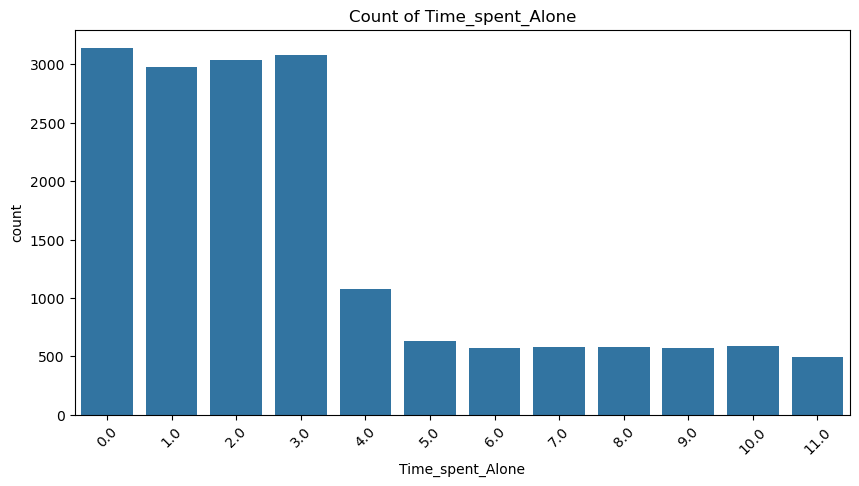

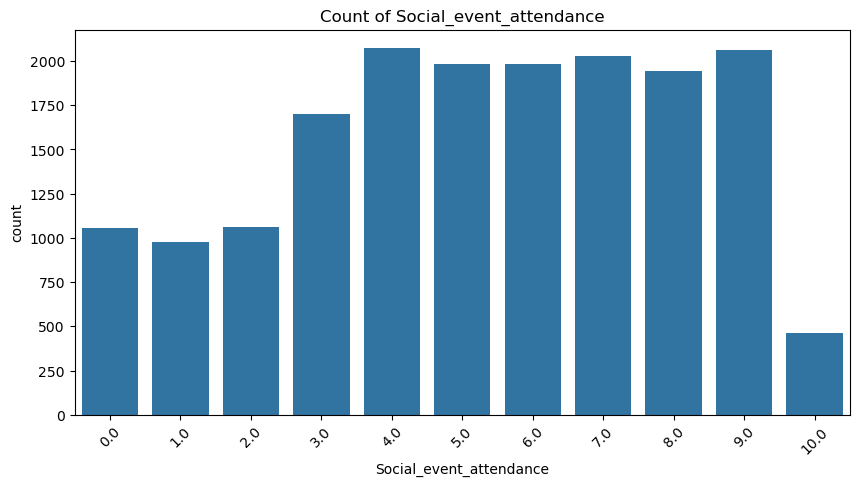

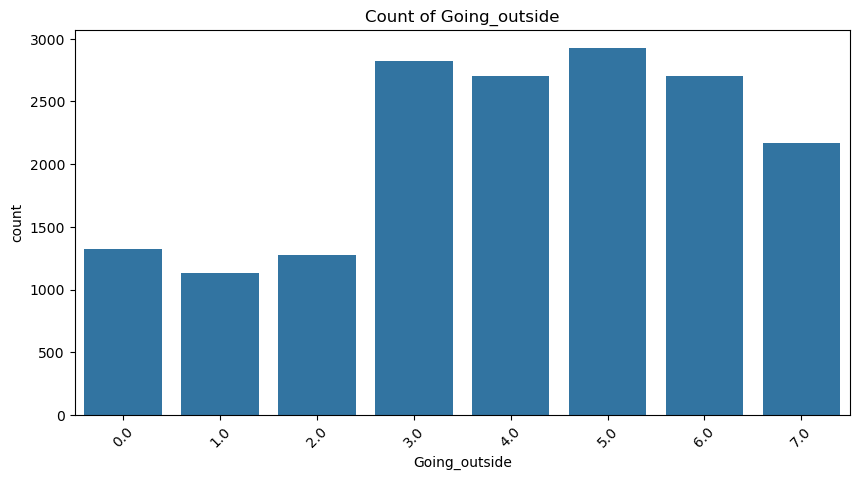

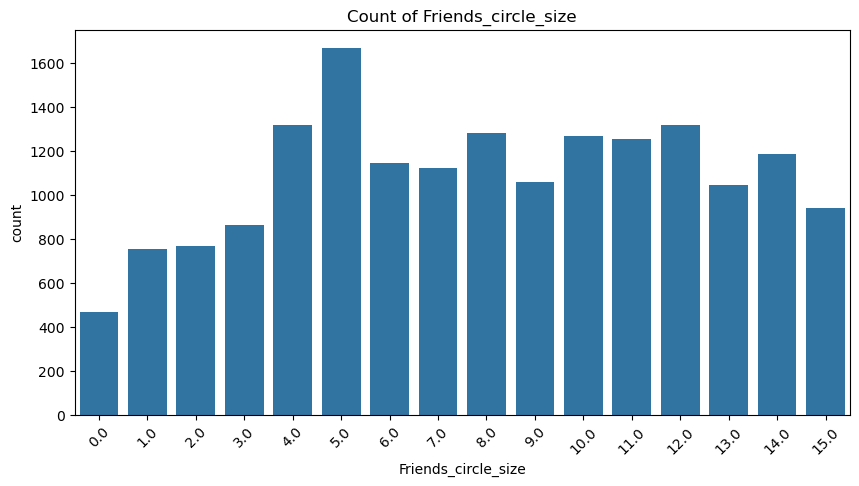

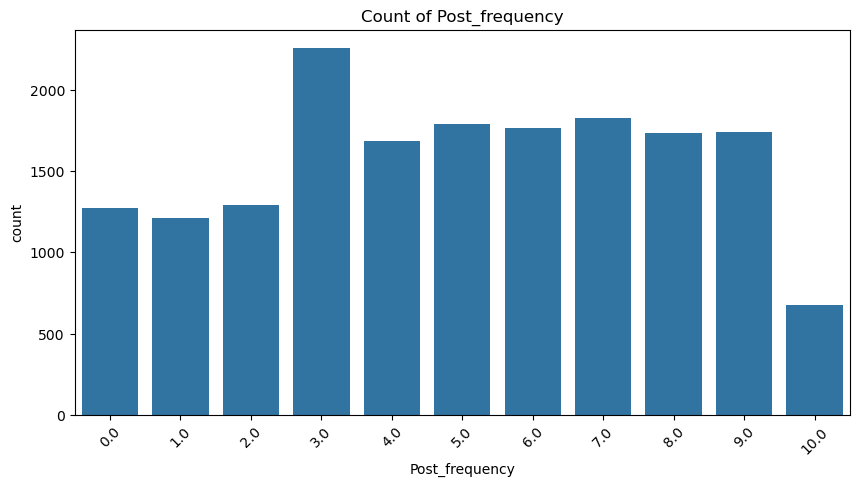

In [76]:
#barchart num_cols with their values printed for easy understanding
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

## 📊 Top Feature Value Insights

| Feature                  | Top Value | Count |
|--------------------------|-----------|-------|
| Time Spent Alone         | 0.0       | 3139  |
| Time Spent Alone         | 3.0       | 3081  |
| Time Spent Alone         | 2.0       | 3039  |
| Social Event Attendance  | 4.0       | 2073  |
| Social Event Attendance  | 9.0       | 2063  |
| Social Event Attendance  | 7.0       | 2031  |
| Going Outside            | 5.0       | 2923  |
| Going Outside            | 3.0       | 2822  |
| Going Outside            | 4.0       | 2703  |
| Friends Circle Size      | 5.0       | 1669  |
| Friends Circle Size      | 4.0       | 1317  |
| Friends Circle Size      | 12.0      | 1317  |
| Post Frequency           | 3.0       | 2258  |
| Post Frequency           | 7.0       | 1827  |
| Post Frequency           | 5.0       | 1788  |


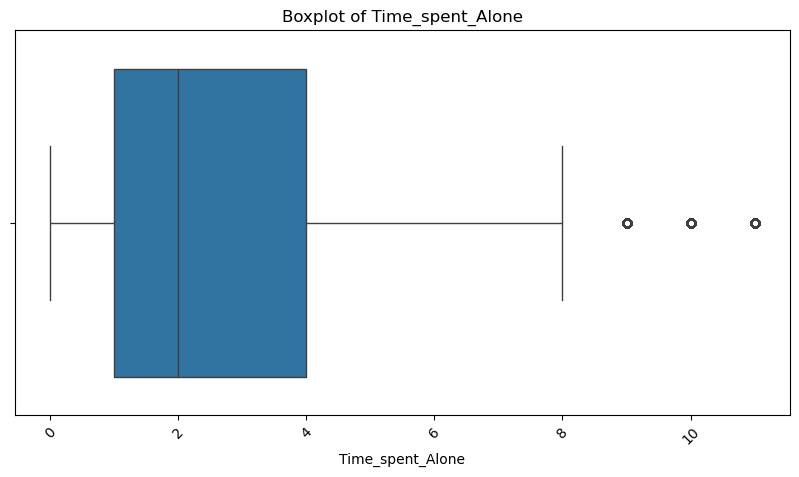

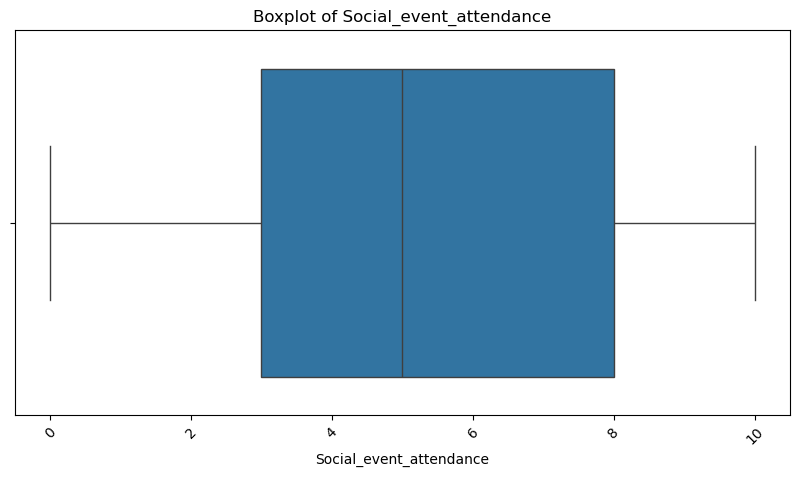

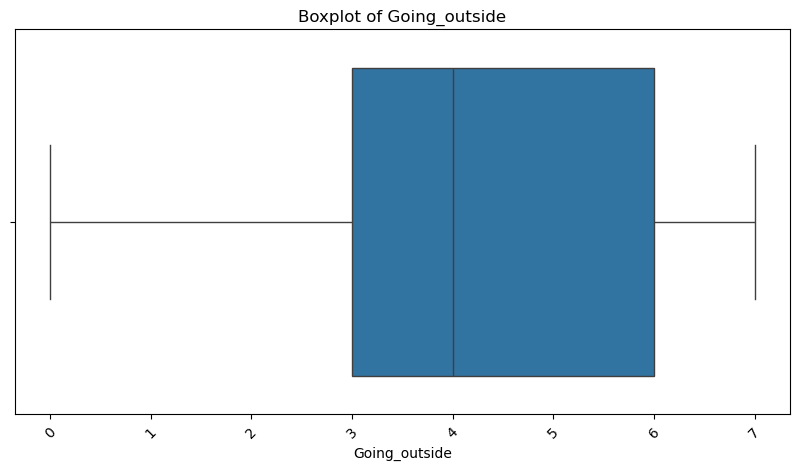

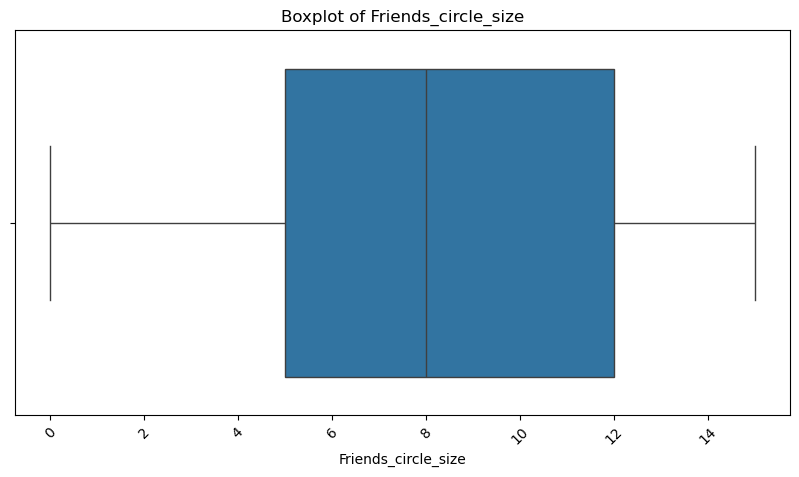

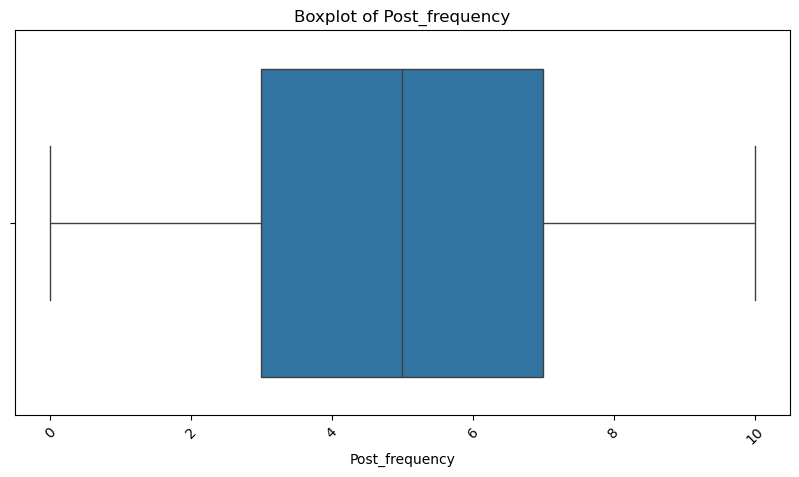

In [77]:
# boxplot of num_cols 
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Histogram

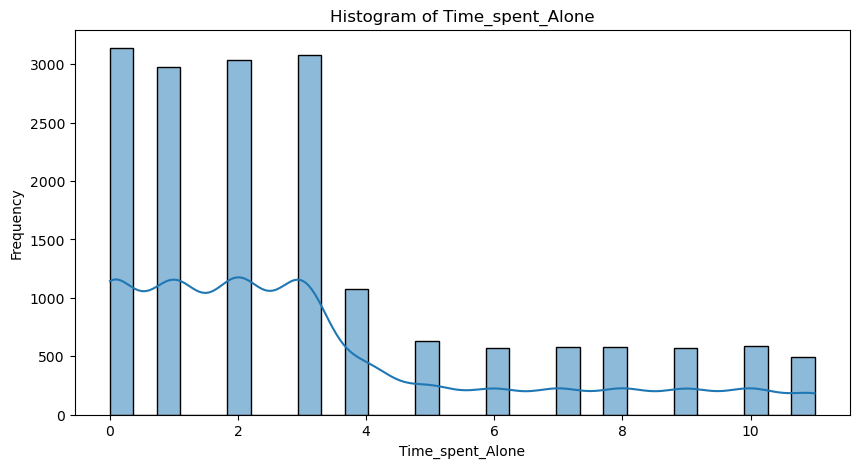

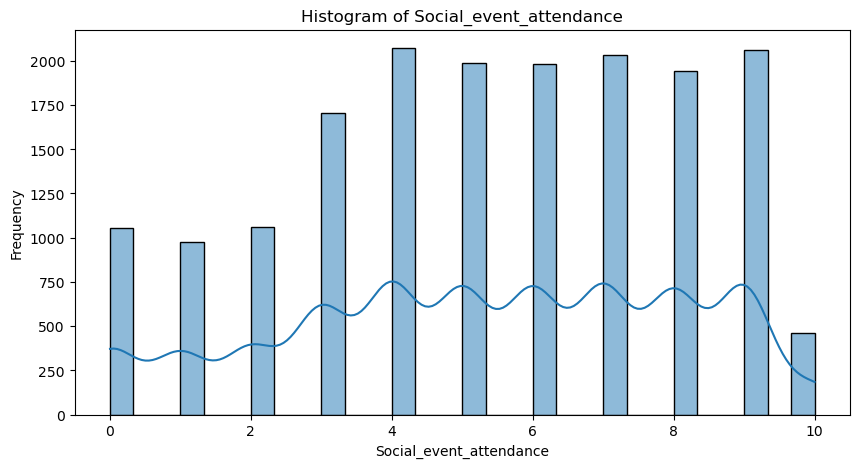

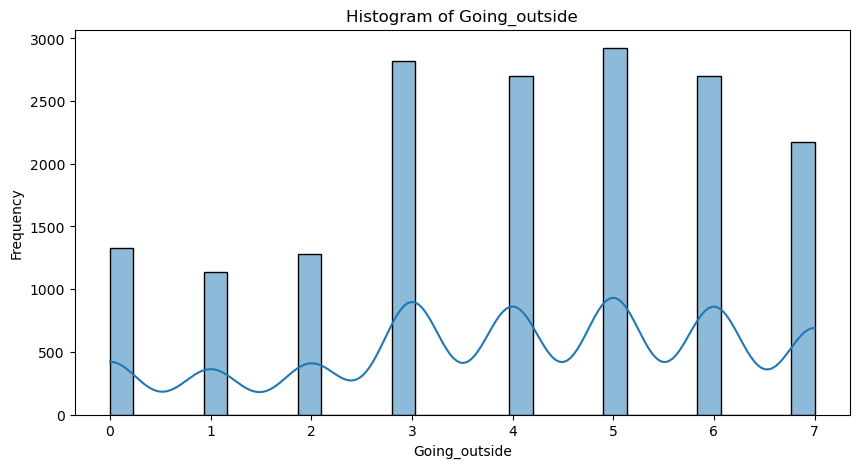

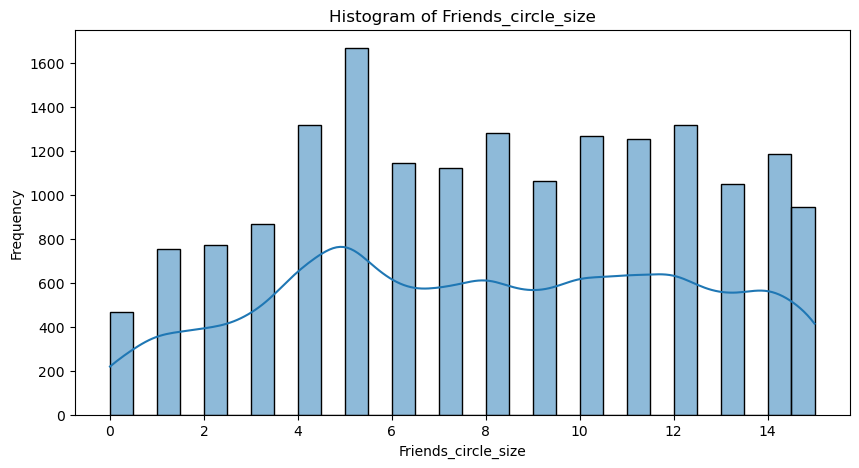

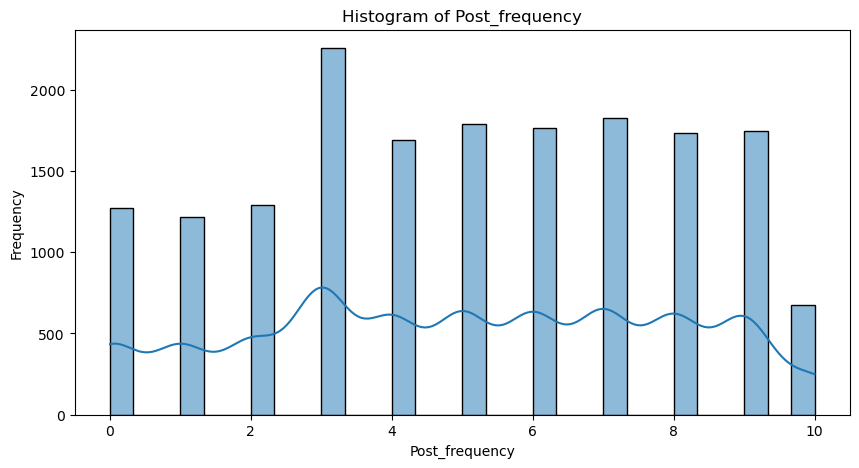

In [78]:
# Histogram num_cols
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Categorical Features

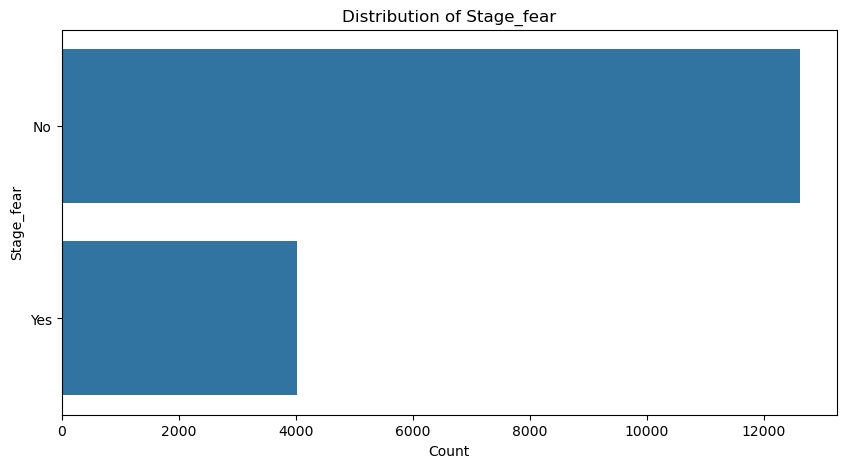

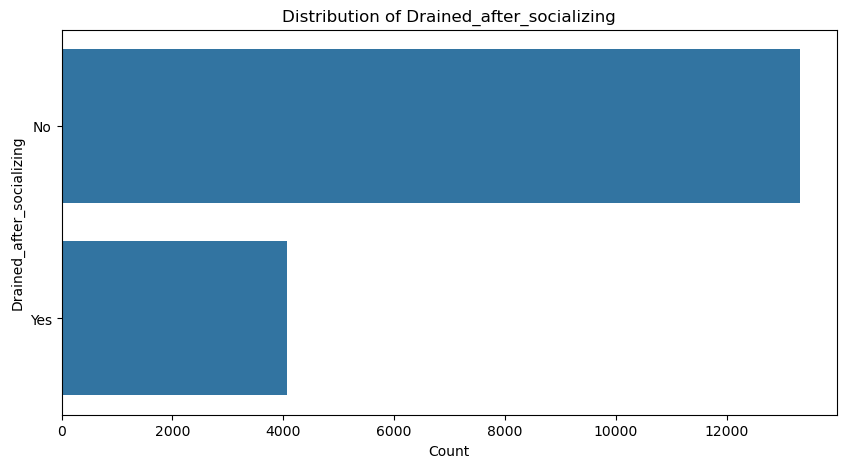

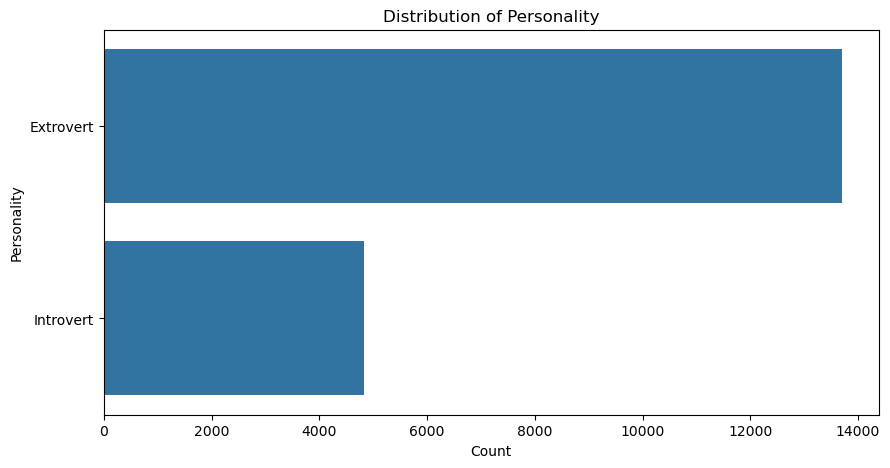

In [79]:
# distribution of categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## 📊 Value Counts for Categorical Features

### Stage Fear

| Stage Fear | Count |
|------------|-------|
| No         | 12,609 |
| Yes        | 4,022  |
| NaN        | 1,893  |

---

### Drained After Socializing

| Drained After Socializing | Count |
|----------------------------|-------|
| No                         | 13,313 |
| Yes                        | 4,062  |
| NaN                        | 1,149  |

---

### Personality

| Personality | Count |
|-------------|-------|
| Extrovert   | 13,699 |
| Introvert   | 4,825  |


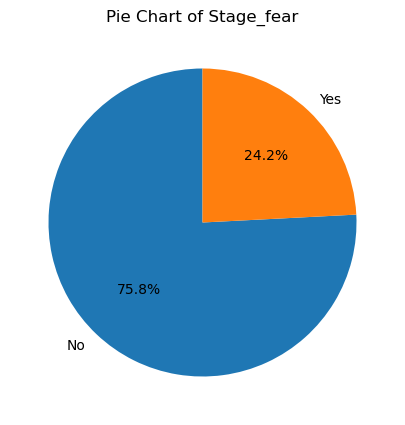

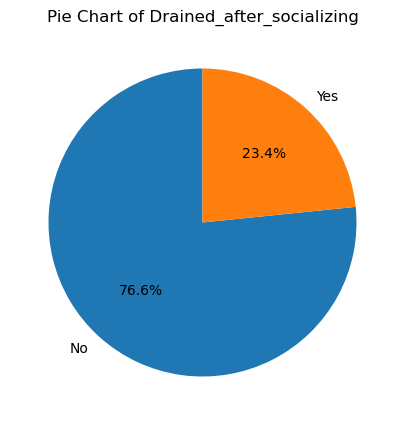

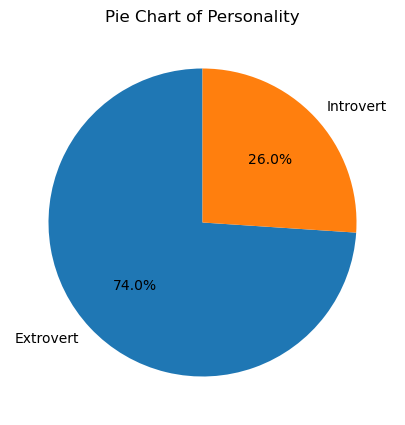

In [80]:
# Pie chart for categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

# Numerical Vs Target Column

In [81]:
# Remove Personality from categorical columns and save it to a new variable, target_col
target_col = 'Personality'
cat_cols.remove(target_col)

### Scatter Plot

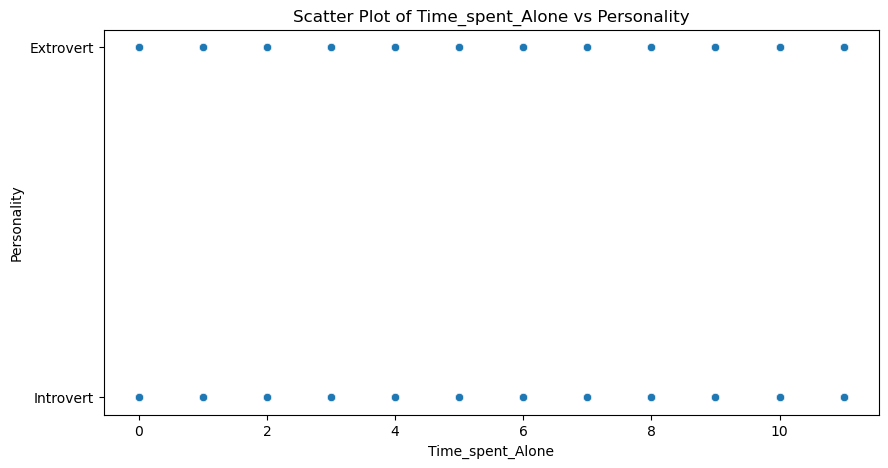

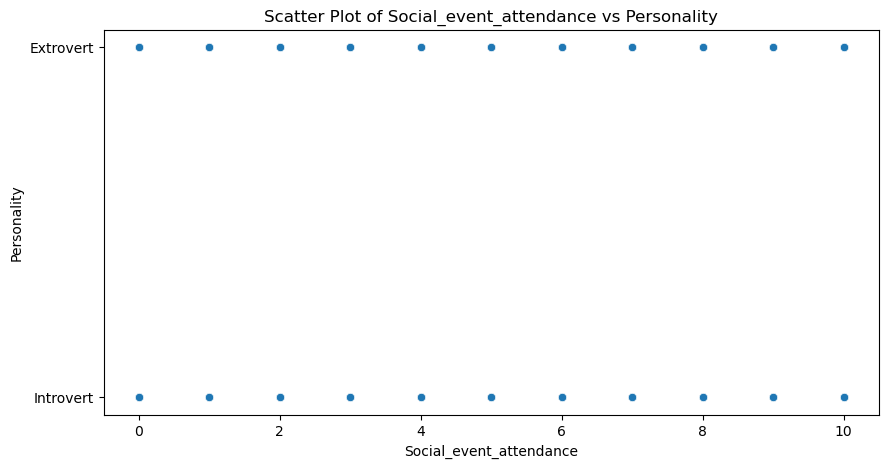

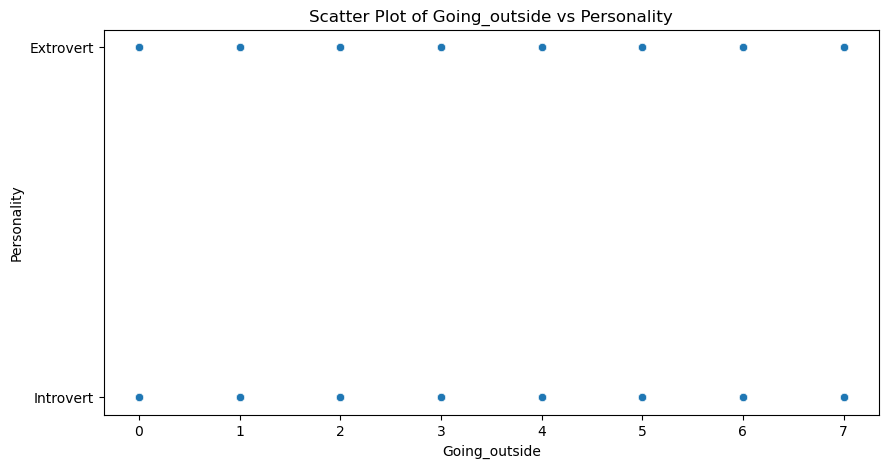

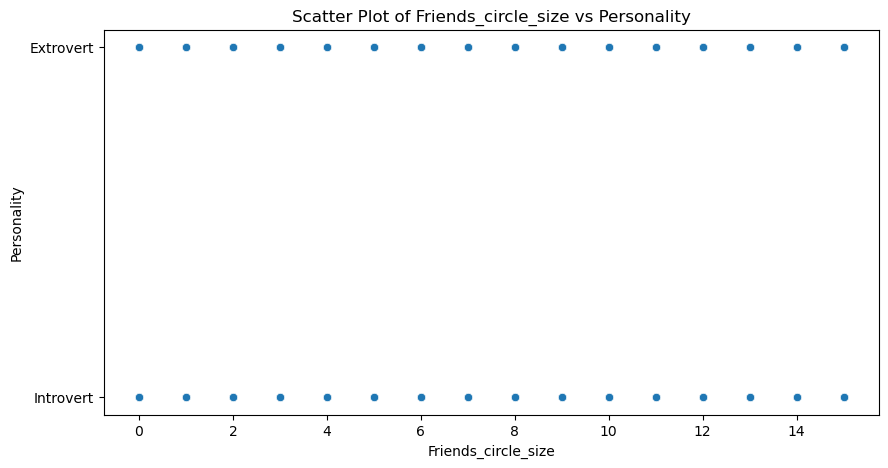

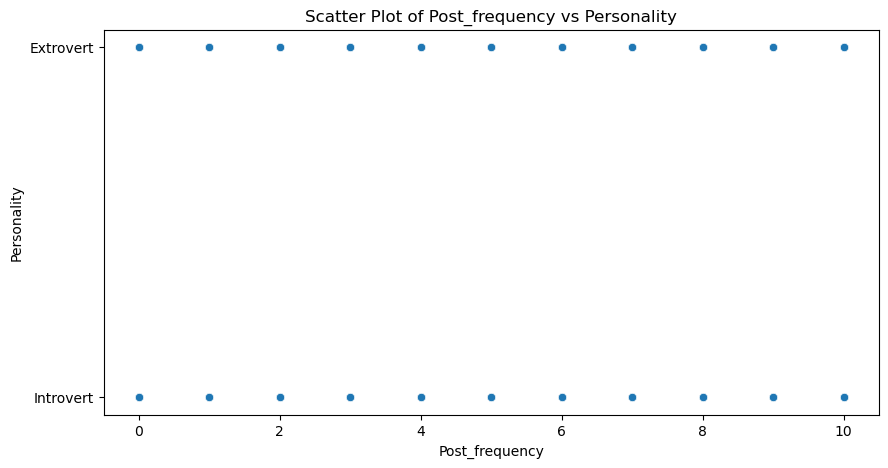

In [82]:
# Scatter plot for numerical columns against target column
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=col, y=target_col, data=df)
    plt.title(f'Scatter Plot of {col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

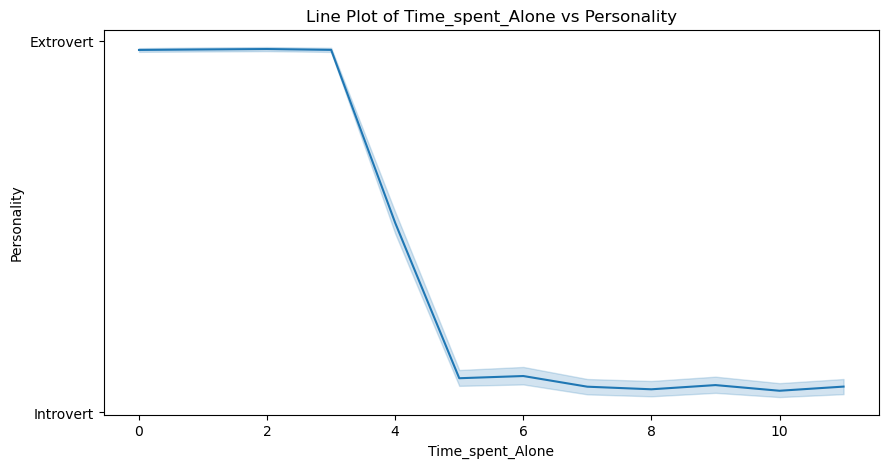

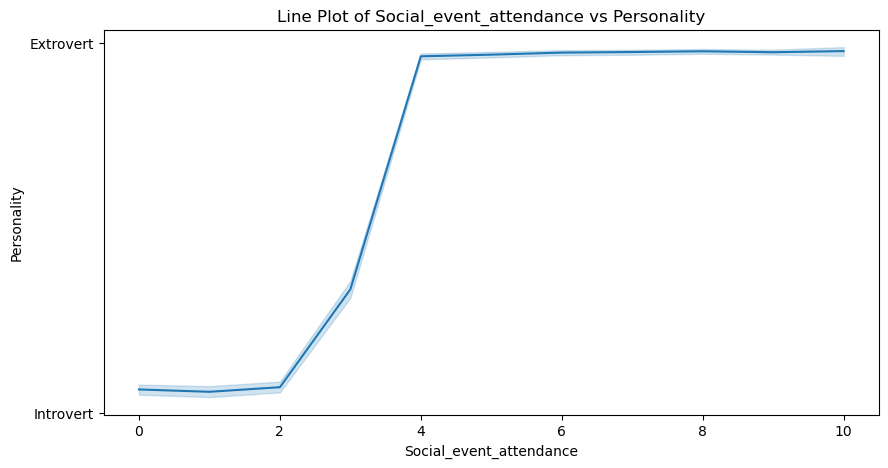

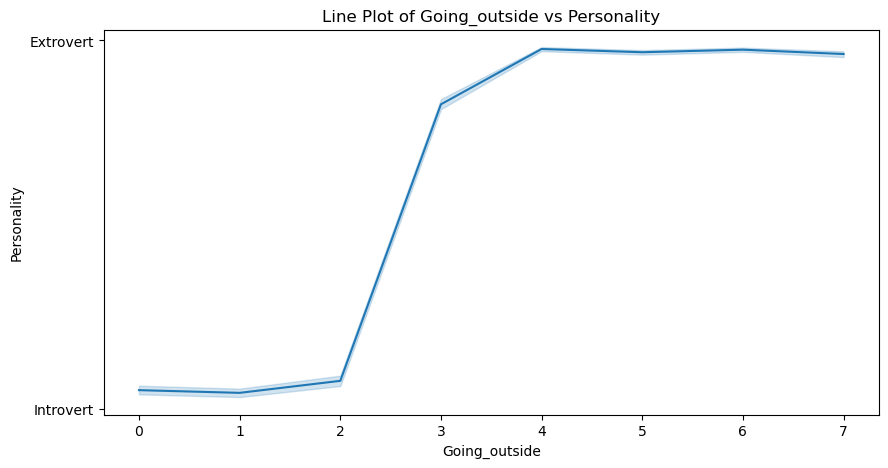

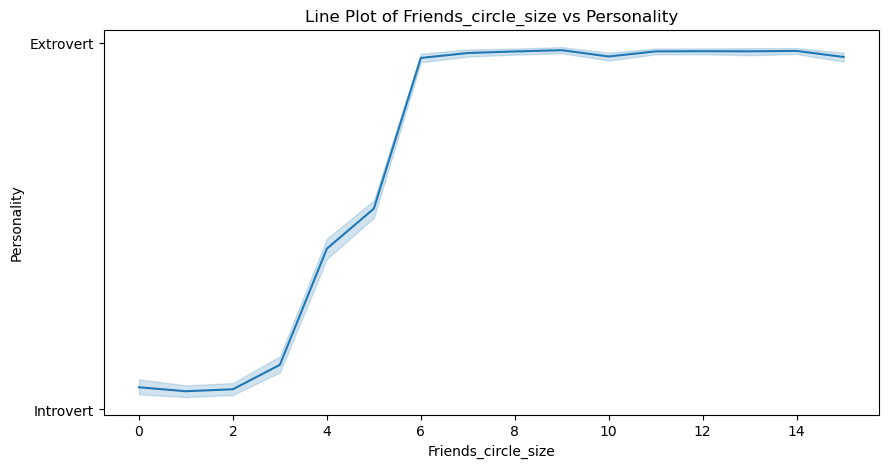

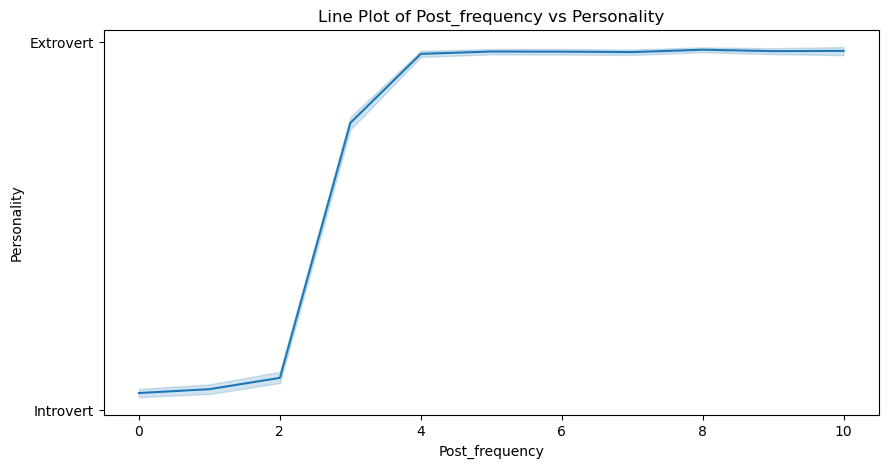

In [83]:
# line graph of num_cols vs target_col
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=col, y=target_col, data=df)
    plt.title(f'Line Plot of {col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()


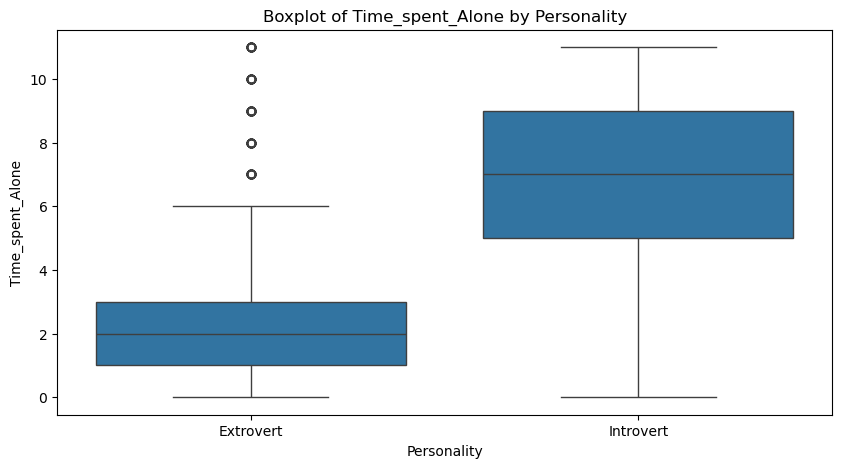

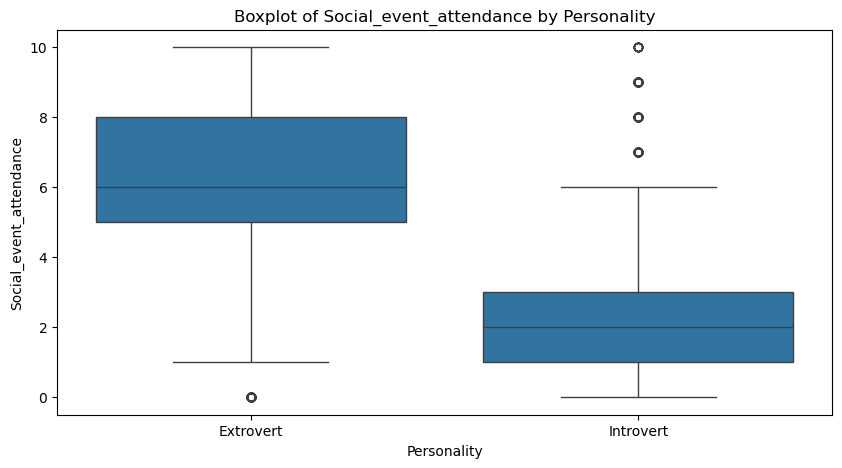

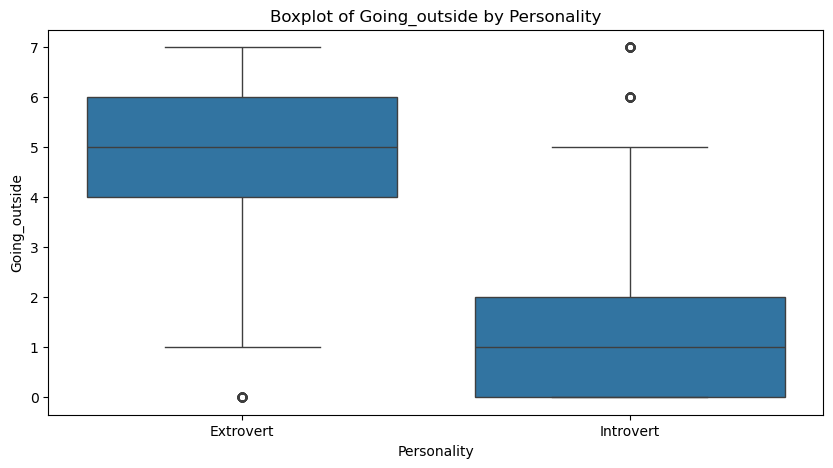

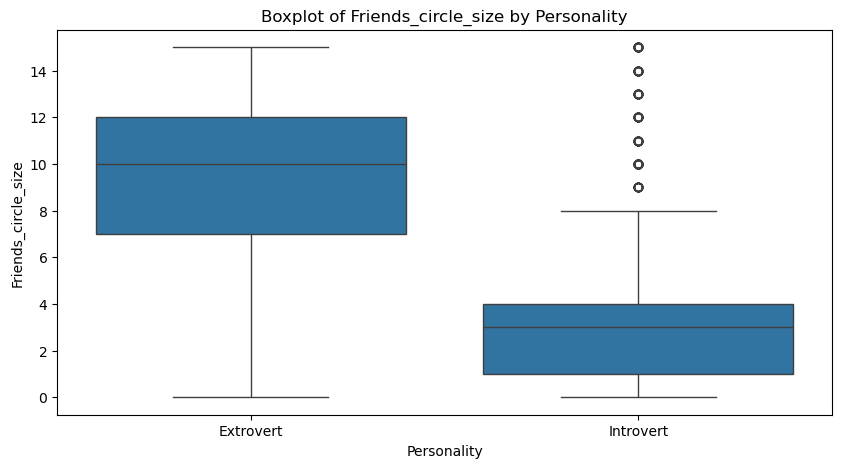

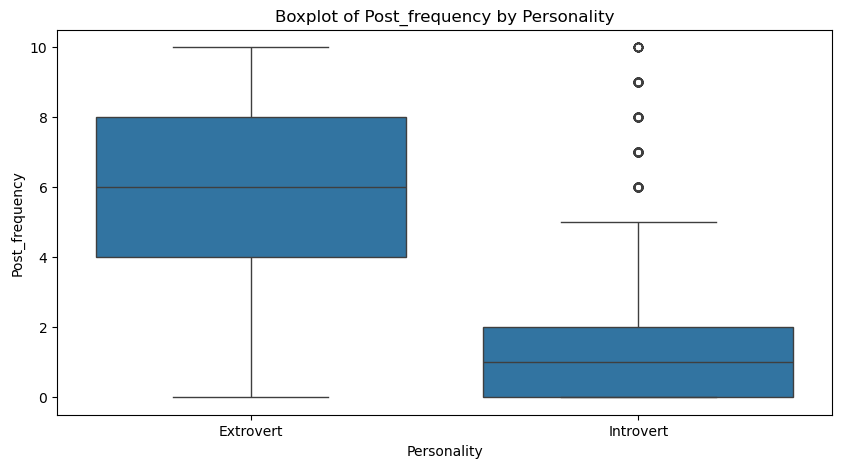

In [84]:
# Boxplot numerical vs target_col
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.show()

### Use IQR or Z-score to flag outliers

In [85]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example:
outliers_time = detect_outliers_iqr(df, 'Time_spent_Alone')
print("Outliers in 'Time_spent_Alone':", outliers_time.shape[0])

Outliers in 'Time_spent_Alone': 1653


In [86]:
print(df["Time_spent_Alone"].max())
print(df["Time_spent_Alone"].min())
outliers_time.nunique()


11.0
0.0


Time_spent_Alone              3
Stage_fear                    2
Social_event_attendance      11
Going_outside                 8
Drained_after_socializing     2
Friends_circle_size          16
Post_frequency               10
Personality                   2
dtype: int64

In [87]:
print(f"outliers(Introvert) {outliers_time.loc[outliers_time["Personality"] == "Introvert"].shape}")
print(f"outliers(Extrovert) {outliers_time.loc[outliers_time["Personality"] == "Extrovert"].shape}")
print(f"df Intovert : {df.loc[df["Personality"] == "Introvert"].shape}")
print(f"df Extrovert : {df.loc[df["Personality"] == "Extrovert"].shape}")

outliers(Introvert) (1543, 8)
outliers(Extrovert) (110, 8)
df Intovert : (4825, 8)
df Extrovert : (13699, 8)


Outliers (Introvert): 1543
Outliers (Extrovert): 110
Total Introverts: 4825
Total Extroverts: 13699


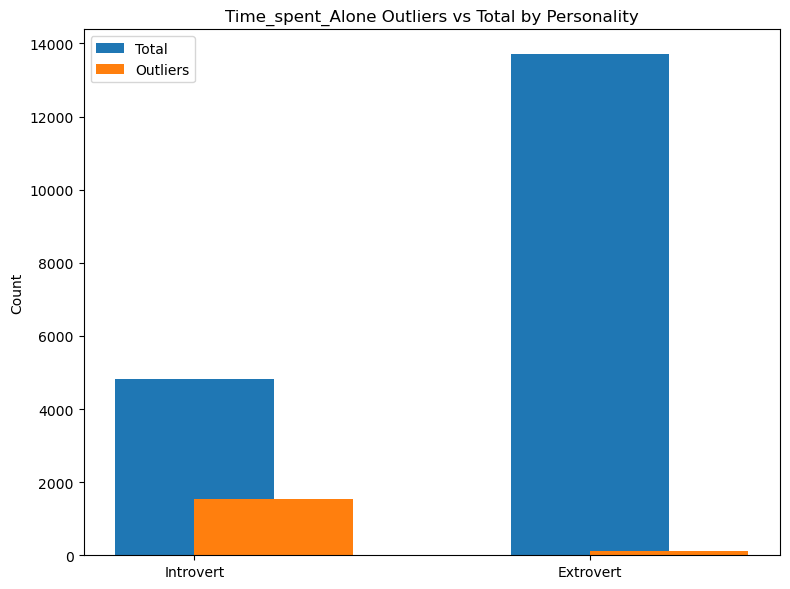

In [88]:
# Detect outliers for a specific column (example: 'Time_spent_Alone')
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example using Time_spent_Alone
target_column = 'Time_spent_Alone'
outliers_time = detect_outliers_iqr(df, target_column)

# Count values
introvert_total = df[df["Personality"] == "Introvert"].shape[0]
extrovert_total = df[df["Personality"] == "Extrovert"].shape[0]

introvert_outliers = outliers_time[outliers_time["Personality"] == "Introvert"].shape[0]
extrovert_outliers = outliers_time[outliers_time["Personality"] == "Extrovert"].shape[0]

# Print statements (as requested)
print(f"Outliers (Introvert): {introvert_outliers}")
print(f"Outliers (Extrovert): {extrovert_outliers}")
print(f"Total Introverts: {introvert_total}")
print(f"Total Extroverts: {extrovert_total}")

# Bar chart data
categories = ['Introvert', 'Extrovert']
total_values = [introvert_total, extrovert_total]
outlier_values = [introvert_outliers, extrovert_outliers]

# Plotting
x = range(len(categories))
plt.figure(figsize=(8, 6))
plt.bar(x, total_values, width=0.4, label='Total', align='center')
plt.bar(x, outlier_values, width=0.4, label='Outliers', align='edge')
plt.xticks(x, categories)
plt.ylabel('Count')
plt.title(f'{target_column} Outliers vs Total by Personality')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20328\2913990828.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


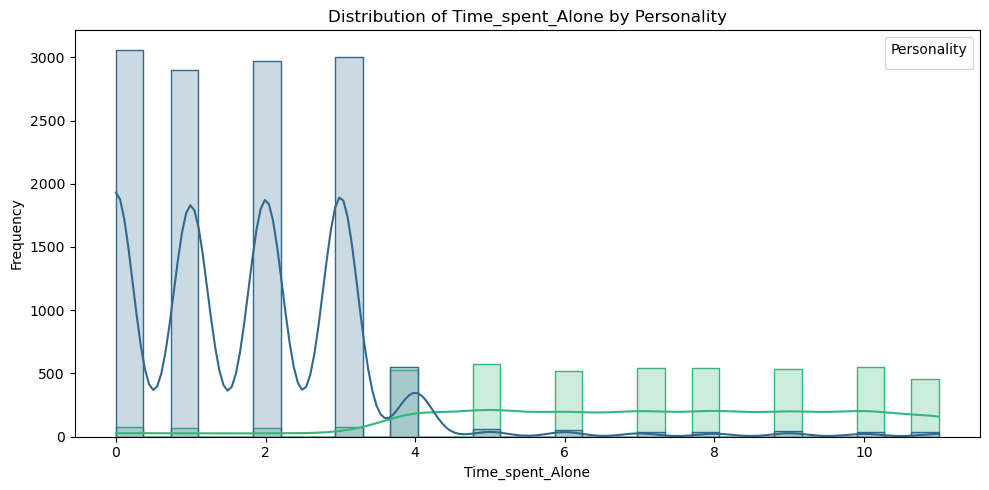

C:\Users\HP\AppData\Local\Temp\ipykernel_20328\2913990828.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


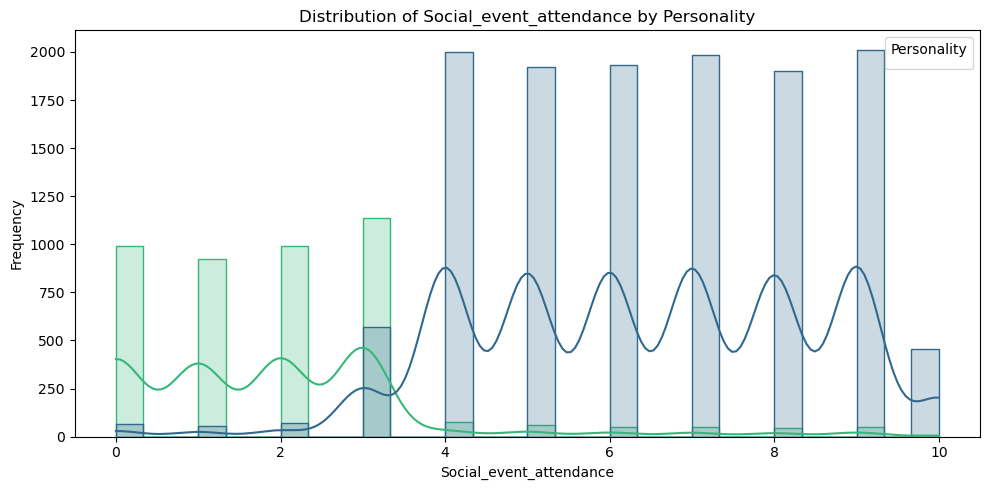

C:\Users\HP\AppData\Local\Temp\ipykernel_20328\2913990828.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


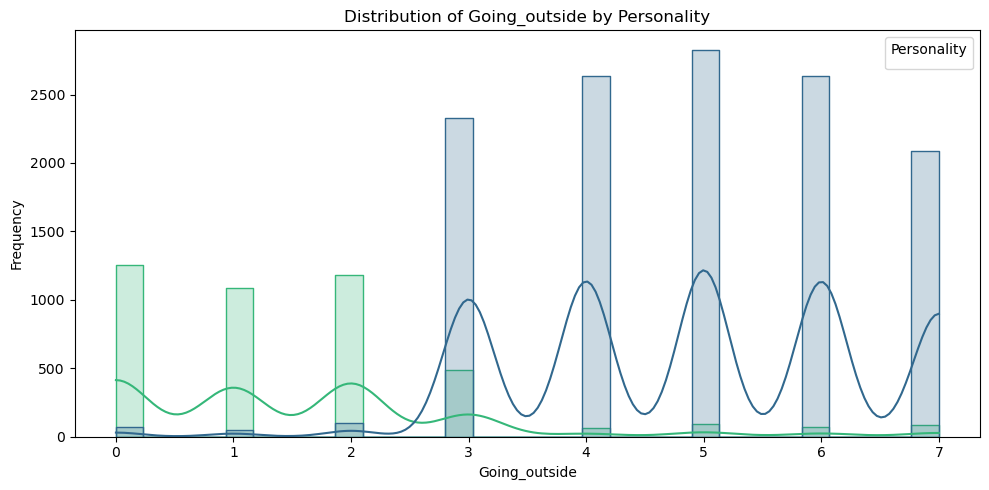

C:\Users\HP\AppData\Local\Temp\ipykernel_20328\2913990828.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


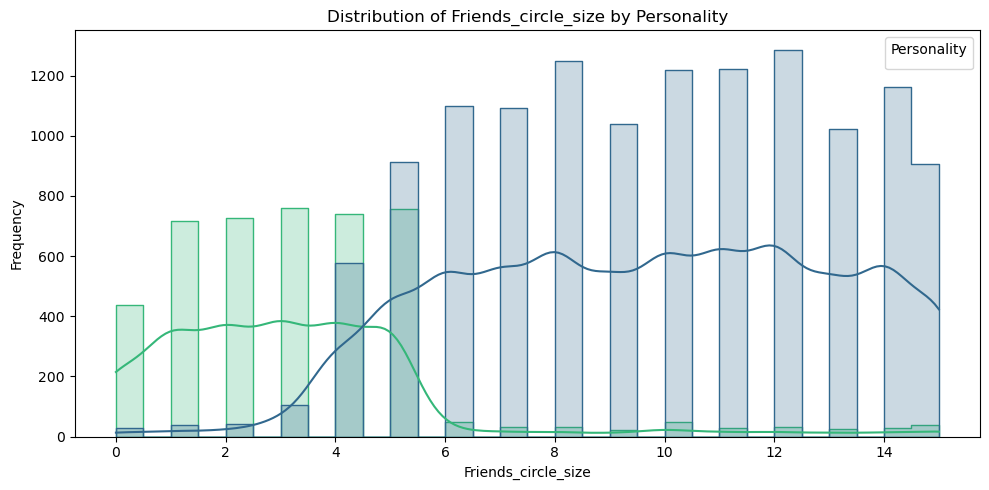

C:\Users\HP\AppData\Local\Temp\ipykernel_20328\2913990828.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target_col)


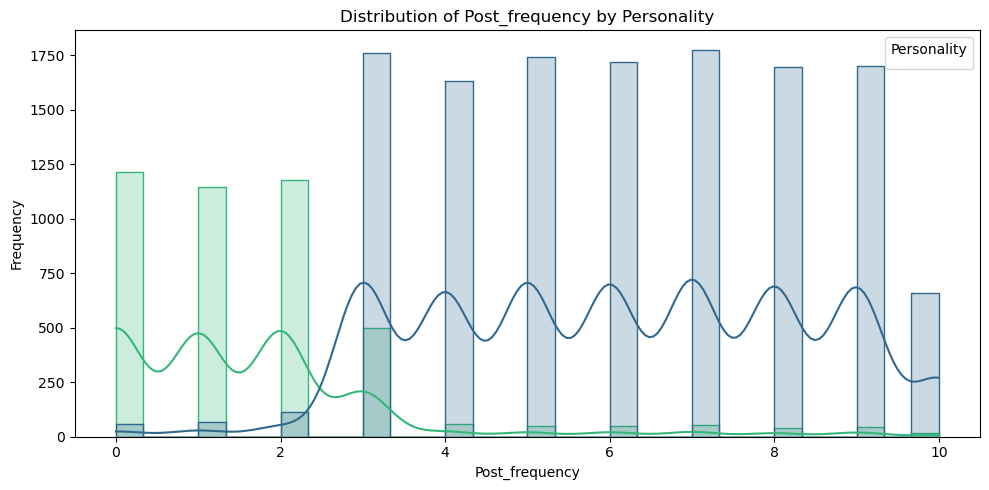

In [89]:
# Histogram
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=30, palette="viridis", element="step")
    plt.title(f'Distribution of {col} by {target_col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

In [50]:
df2 = df.copy()
df2.dropna(inplace=True)

In [51]:
df2[num_cols] = df2[num_cols].apply(np.log1p)

In [52]:
from sklearn.preprocessing import Normalizer

In [53]:
# Create the normalizer instance (default norm='l2')
normalizer = Normalizer()

# Fit and transform your data (works row-wise)
normalized_data = normalizer.fit_transform(df2[num_cols])

# Convert back to DataFrame if needed
normalized_df = pd.DataFrame(normalized_data, columns=num_cols)
normalized_df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,0.000000,0.468188,0.387232,0.667087,0.431099
1,0.166629,0.499888,0.333259,0.576443,0.528203
2,0.330888,0.496333,0.330888,0.593111,0.427667
3,0.296196,0.592391,0.373757,0.433919,0.483074
4,0.148694,0.471348,0.417437,0.580931,0.493950


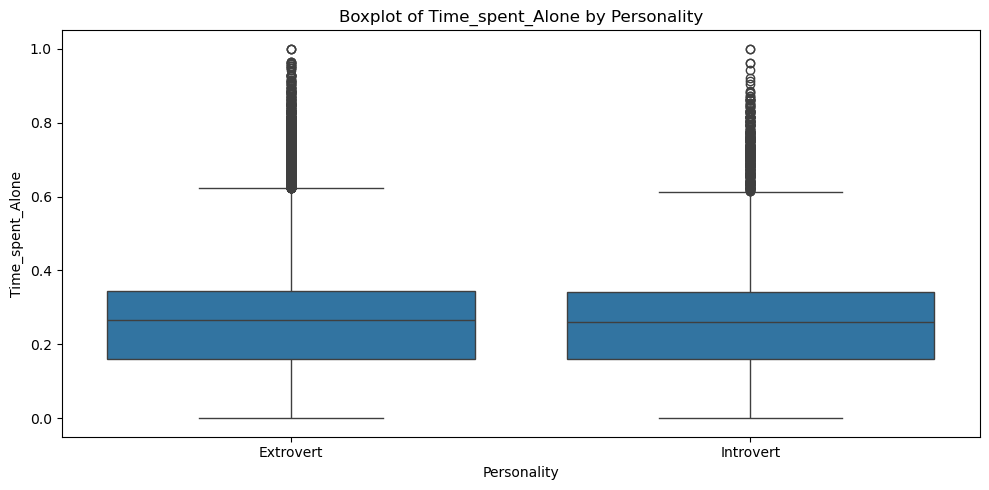

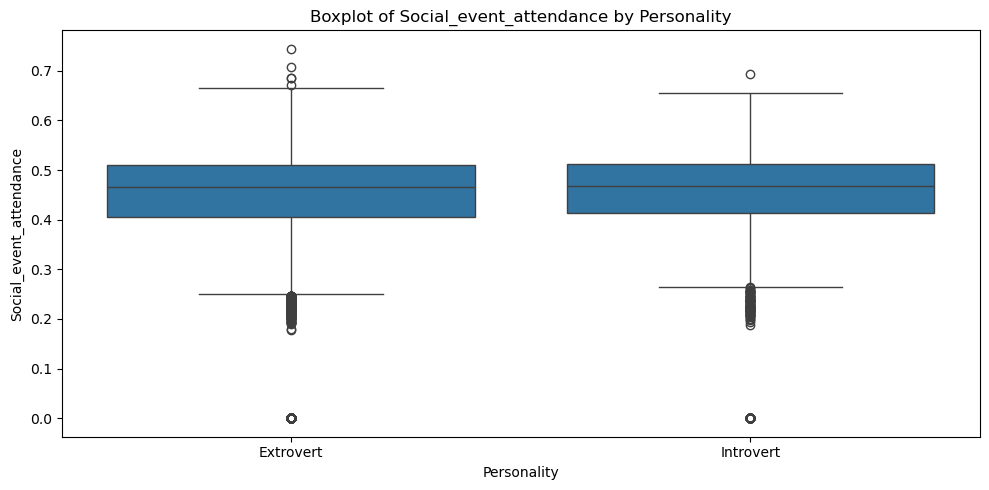

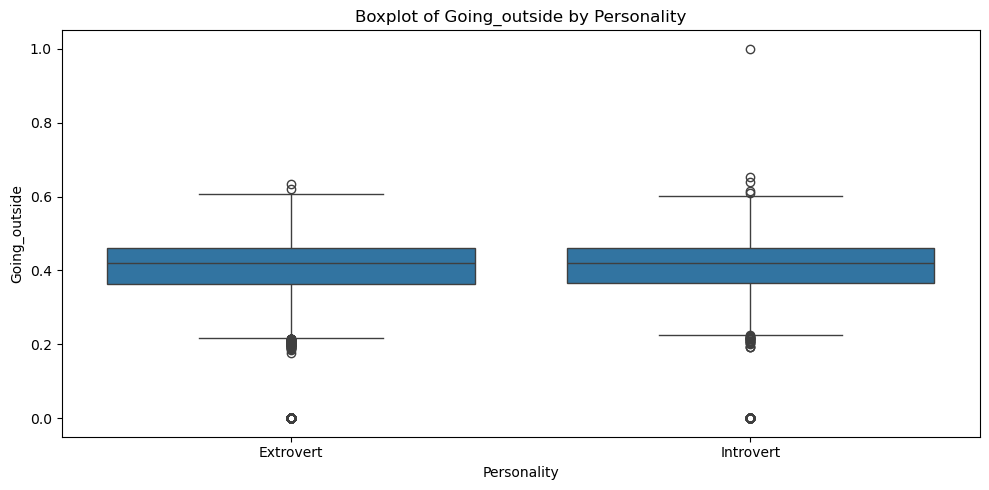

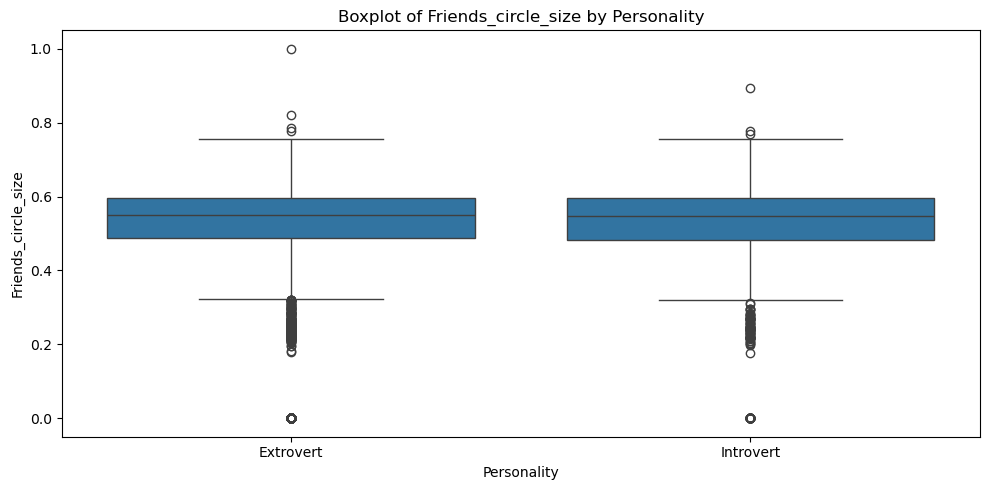

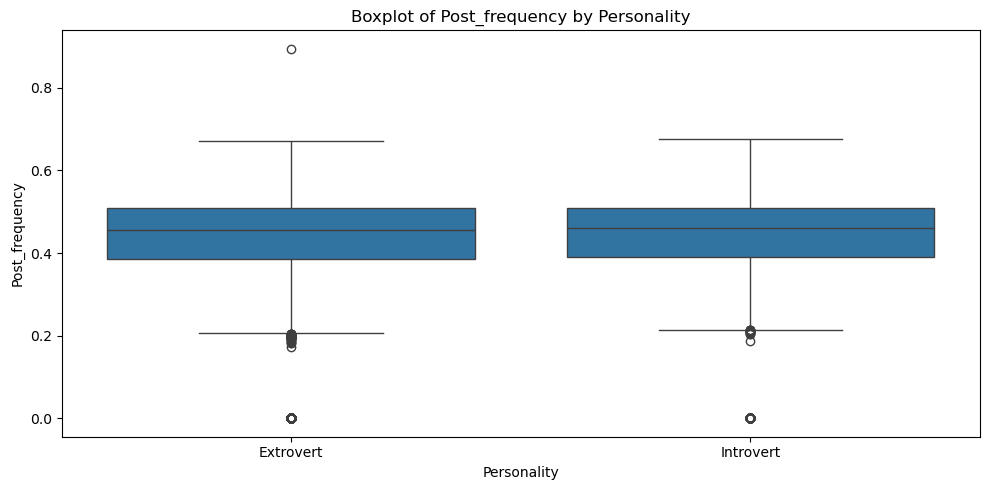

In [54]:
# Box plot df2
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[target_col], y=col, data=normalized_df)
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Numerical Vs Categorical

In [55]:
#